In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('paper')

data = pd.read_csv('../data/Heart_Disease.csv')

print('Data info:\n',data.info())
print('\nData description:\n',data.describe())
print('\nTarget value counts:\n',data['target'].value_counts())
print('\nMissing values:\n',data.isna().sum())
print('\nData shape:\t',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
Data info:
 None

Data description:
                age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190

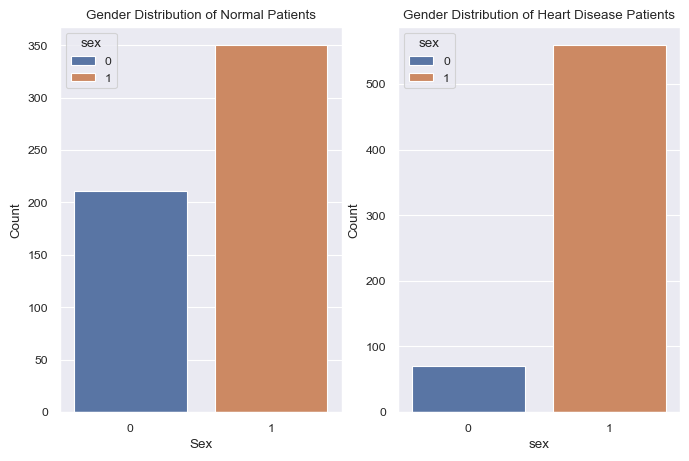

In [8]:
norm_patient = data[data['target'] == 0]
heart_disease_patient = data[data['target'] == 1]

fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=2)

sns.countplot(x='sex', hue='sex', data=norm_patient, ax=ax[0])
ax[0].set_title('Gender Distribution of Normal Patients')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')

sns.countplot(x='sex', hue='sex', data=heart_disease_patient, ax=ax[1])

ax[1].set_xlabel('sex')
ax[1].set_ylabel('Count')
ax[1].set_title('Gender Distribution of Heart Disease Patients')

plt.show()

# Features Selection

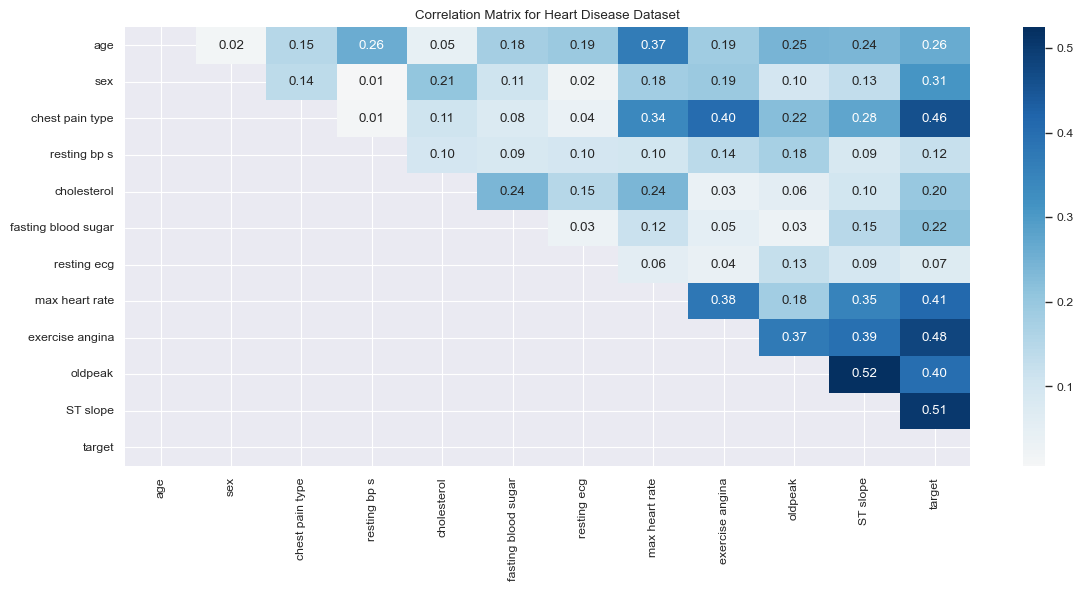

In [3]:
plt.figure(figsize=(12,6))
corr_mat = data.corr().abs()
mask = np.tril(np.ones_like(corr_mat,dtype=bool))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Correlation Matrix for Heart Disease Dataset')
plt.tight_layout()
plt.show()

Drop highly correlated features if exist

In [4]:
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.7)]
print(f'Features to drop due to high correlation: {to_drop}')

Features to drop due to high correlation: []
